First try for creating likelihood plots. Some code snipplets are copied from https://github.com/ElisabethRoesch/Bifurcations 

###### [1] Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from numpy import genfromtxt
from matplotlib import ticker, cm
from matplotlib.patches import Rectangle
from numpy import inf
#from numpy import NaN

In [2]:
def get_ll_alps_one(alp_ind): # converts number of alpha to actual alpha value (alp_ind is number of alpha value)
    alp = [0.1, 0.9, 1.1, 1.5]  # actual alpha values they have data for
    real_value = alp[alp_ind-1]
    return real_value

def get_ll_ics_one(ics_ind): # converts number of ic to actual ic value
    ics= [0.4, 0.5, 1.0, 1.3, 2.3] # actual ic values they have data for 
    real_value = ics[ics_ind-1]
    return real_value

def read_ll_file(w0, n0, a, m, M, noise, path_to_file):
    name = str(w0)+"_"+str(n0)+"_"+str(a)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    csv[csv == -inf] = -1000
    return csv

In [3]:
def n_traj(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)

In [4]:
def bif_plot(m):
    
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n_traj(a, m, True) for a in a_vals]
    n_minus = [n_traj(a, m, False) for a in a_vals]

    plt.plot(a_vals, np.real(n_plus), color='black')
    plt.plot(a_vals, np.real(n_minus), color='black', linestyle = "--")
    plt.plot(2*m, 1, marker='o', color='black', markersize=6)
    plt.ylim(0, 4)
    plt.axhline(y=0, color='black')
    plt.suptitle('Bifurcation Diagram of Klausmeier Model')
    plt.title(f'm={m}')
    plt.xlabel('water input a')
    plt.ylabel('biomass n')
    plt.grid(True)
    #plt.legend()
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    #plt.text(2*m, plt.ylim()[0], '2m', color='green', ha='center', va='bottom')
    plt.show()

In [8]:
def make_ll_plot(fig,ax,csv,ind): # run this func for all prm combinations to consider (all ind to consider). ind is index of alphas array (which contains the numbers of alphas)

    al_plot_nr = get_ll_alps_one(ind[0])
    ic_plot_nr = get_ll_ics_one(ind[1])
    
    # points at which ll data is evaluated
    #a_x_ticks = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
    #inits_y_ticks = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    inits_y_ticks = np.arange(0.0, 4.1, 0.1)

    levels = np.linspace(-1000, 0, 30)
    
    plt.plot([al_plot_nr],[ic_plot_nr],marker="x",label="Truth",color="white",markersize=12,markerfacecolor='gold',markeredgewidth=2.0, markeredgecolor="gold", zorder=10)
    
    if (np.isfinite(csv).any()):   
        ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
        ax.set_facecolor('white')
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        #countouring=ax.contourf(a_x_ticks, inits_y_ticks,csv,30,cmap='Reds',alpha=0.9)
        ax.set_yticks(inits_y_ticks[::2])
        ax.set_xticks(a_x_ticks[::2])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring, fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return countouring
    else:      
        print("eieiei")
        csv[csv == -inf] = -1000
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        ax.set_yticks(inits_y_ticks[::2])
        ax.set_xticks(a_x_ticks[::2])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return("eieieie")

In [11]:
path_to_file= "c:/Users/lisah/Documents/Repos/ma-code/data/likelihood/m0.45/"

#a_vals = [0.1, 0.9, 1.1, 1.5] 
#n0_vals = [0.4, 0.5, 1.0, 1.3, 2.3]
index_combos = [[1,1], [2,4], [3,5], [4,2], [4,3]]
prm_ind = index_combos[1]

m = 0.45
w0 = 0.0
M = 1000
noise = 0.0
n0 = get_ll_ics_one(prm_ind[1])
a = get_ll_alps_one(prm_ind[0])
csv = read_ll_file(w0,n0,a,m,M,noise,path_to_file)

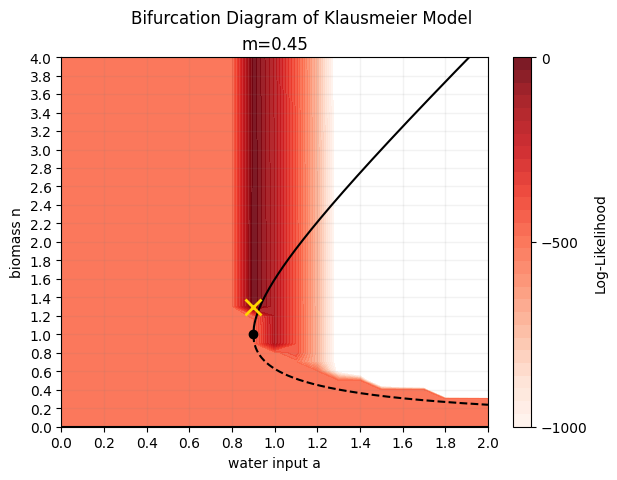

In [12]:
# prm: a = 0.9, n0 = 1.3
fig, ax = plt.subplots()
make_ll_plot(fig, ax, csv, prm_ind)
bif_plot(m)
